<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/tytanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/tytanic/tytanic


/content/drive/MyDrive/tytanic/tytanic


In [4]:
ls


cleandata.csv  train.csv


In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

In [6]:
tytanic_data=pd.read_csv('/content/drive/MyDrive/tytanic/tytanic/train.csv')

In [7]:
tytanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
print(f'Sex:{tytanic_data.Sex.unique()}')
# print(f'Cabin:{tytanic_data.Cabin.unique()}')
print(f'Embarked:{tytanic_data.Embarked.unique()}')

Sex:['male' 'female']
Embarked:['S' 'C' 'Q' nan]


In [9]:
tytanic_data['Sex']=tytanic_data['Sex'].apply({'male':1,'female':2}.get)
tytanic_data['Embarked']=tytanic_data['Embarked'].apply({'S':1,'C':2,'Q':3}.get)

In [10]:
tytanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,NaN,2.0


In [11]:
tytanic_data=tytanic_data[['Survived','Pclass','Sex','Parch','Embarked']]
tytanic_data.head(10)

,Survived,Pclass,Sex,Parch,Embarked
0,0,3,1,0,1.0
1,1,1,2,0,2.0
2,1,3,2,0,1.0
3,1,1,2,0,1.0
4,0,3,1,0,1.0
5,0,3,1,0,3.0
6,0,1,1,0,1.0
7,0,3,1,1,1.0
8,1,3,2,2,1.0
9,1,2,2,0,2.0


In [12]:
tytanic_data.to_csv('cleandata.csv')

In [13]:
ls


cleandata.csv  train.csv


##Data Analysis

In [14]:
print(f'the data is of the shape {tytanic_data.shape}')

the data is of the shape (891, 5)


## Bar plot


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


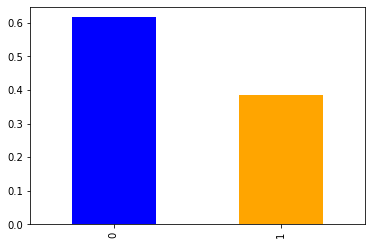

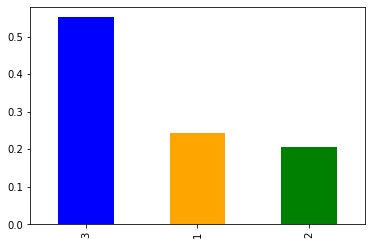

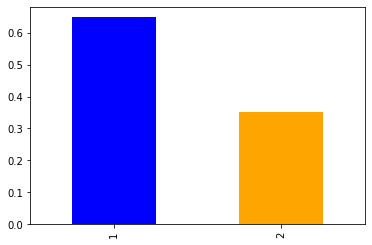

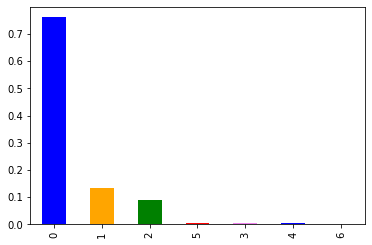

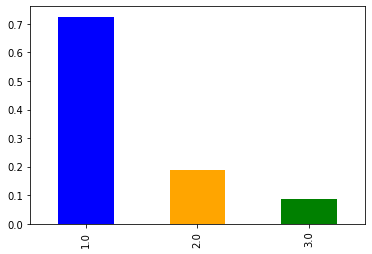

In [21]:
color=['Blue','Orange','green','red','violet']

tytanic_data.Survived.value_counts(normalize=True).plot.bar(color=color)
plt.show()
tytanic_data.Pclass.value_counts(normalize=True).plot.bar(color=color)
plt.show()
tytanic_data.Sex.value_counts(normalize=True).plot.bar(color=color)
plt.show()
tytanic_data.Parch.value_counts(normalize=True).plot.bar(color=color)
plt.show()
tytanic_data.Embarked.value_counts(normalize=True).plot.bar(color=color)
plt.show()

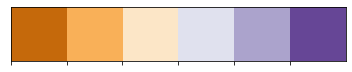

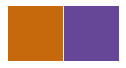

In [22]:
sns.palplot(sns.color_palette('PuOr'))
pal = sns.color_palette('PuOr',6)
pal.as_hex()

plt.style.use(['seaborn'])
sns_color=['#c6690c', '#664697']
sns.set_palette(sns_color)
sns.palplot(sns.color_palette(sns_color))

In [23]:
print(f'''there are {len(tytanic_data.columns)} namely, {tytanic_data.columns}''')

there are 5 namely, Index(['Survived', 'Pclass', 'Sex', 'Parch', 'Embarked'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


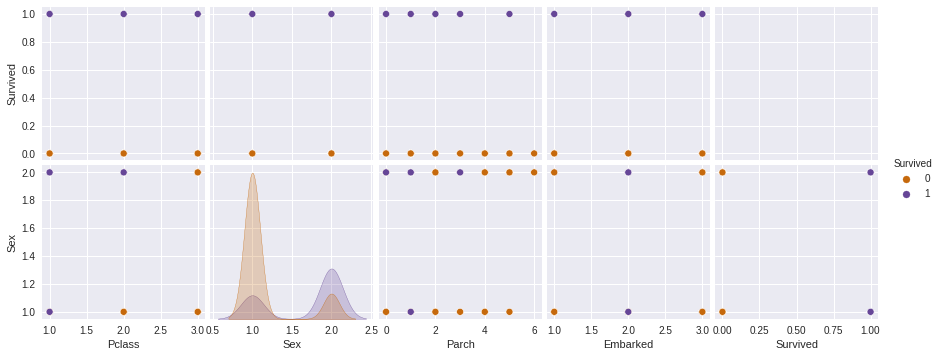

In [26]:
sns.pairplot(tytanic_data,
                 x_vars=['Pclass','Sex','Parch','Embarked','Survived'] ,
                 y_vars=['Survived','Sex'],
             diag_kind='kde',hue='Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


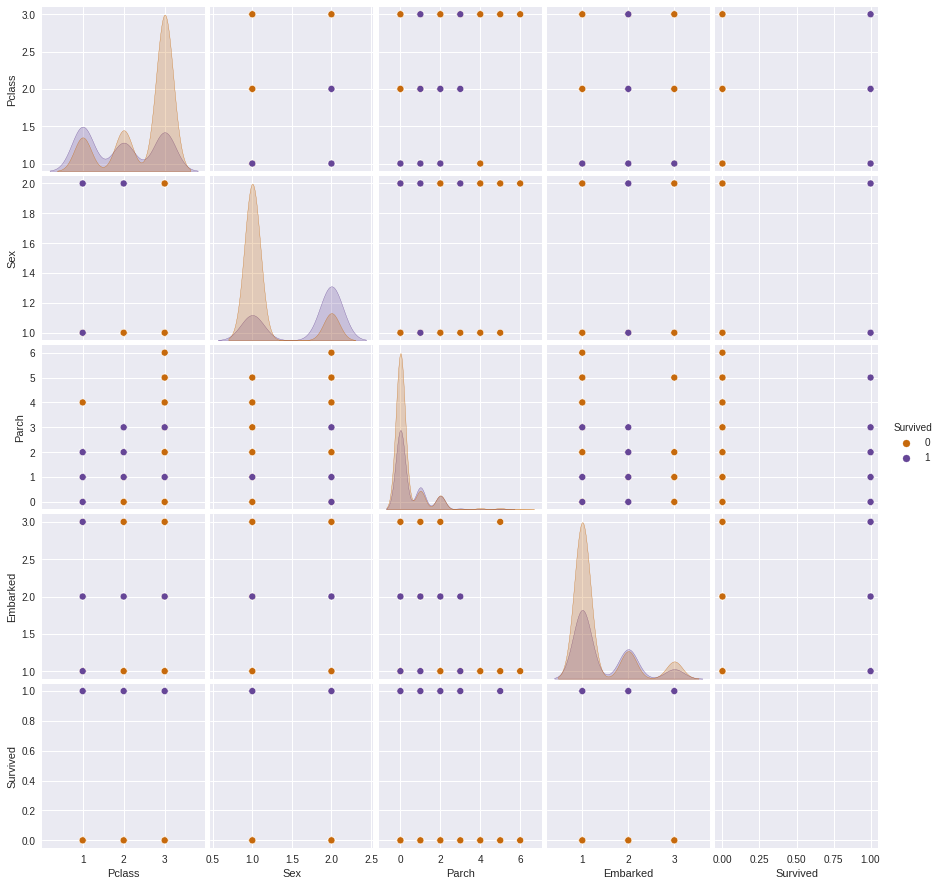

In [27]:
sns.pairplot(tytanic_data,
                 x_vars=['Pclass','Sex','Parch','Embarked','Survived'] ,
                 y_vars=['Pclass','Sex','Parch','Embarked','Survived'],
             diag_kind='kde',hue='Survived')

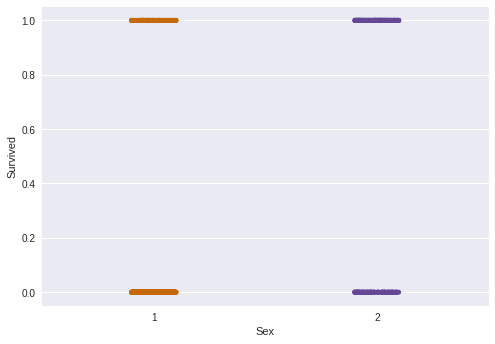

In [28]:
sns.stripplot(y='Survived',x='Sex',data=tytanic_data)

## Data splits